In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/trimmed-ctuiotmalwarecapture31/trimmed_CTU-IoT-Malware-Capture-20-1.csv
/kaggle/input/trimmed-ctuiotmalwarecapture31/trimmed_CTU-IoT-Malware-Capture-1-1.csv
/kaggle/input/trimmed-ctuiotmalwarecapture31/trimmed_CTU-IoT-Malware-Capture-44-1.csv
/kaggle/input/trimmed-ctuiotmalwarecapture31/trimmed_CTU-IoT-Malware-Capture-9-1.csv
/kaggle/input/trimmed-ctuiotmalwarecapture31/trimmed_CTU-IoT-Malware-Capture-8-1.csv
/kaggle/input/trimmed-ctuiotmalwarecapture31/trimmed_CTU-IoT-Malware-Capture-42-1.csv
/kaggle/input/trimmed-ctuiotmalwarecapture31/trimmed_CTU-IoT-Malware-Capture-3-1.csv
/kaggle/input/trimmed-ctuiotmalwarecapture31/trimmed_CTU-IoT-Malware-Capture-34-1.csv
/kaggle/input/trimmed-ctuiotmalwarecapture31/trimmed_CTU-IoT-Malware-Capture-21-1.csv
/kaggle/input/pcapanalysis-31/TG_60_EWMA_1_pcapAnalysis_pcapAnalysis_deviceCTU-IoT-Malware-Capture-3-1_V2Adjust.csv
/kaggle/input/pcapanalysis-31/TG_60_EWMA_1_pcapAnalysis_pcapAnalysis_deviceCTU-IoT-Malware-Capture-34-1_V2Adjust.c

In [2]:
sld=["CTU-IoT-Malware-Capture-34-1", #0
         "CTU-IoT-Malware-Capture-43-1", #1
         "CTU-IoT-Malware-Capture-44-1", #2
         "CTU-IoT-Malware-Capture-49-1", #3
         "CTU-IoT-Malware-Capture-52-1", #4
         "CTU-IoT-Malware-Capture-20-1", #5
         "CTU-IoT-Malware-Capture-21-1", #6
         "CTU-IoT-Malware-Capture-42-1", #7
         "CTU-IoT-Malware-Capture-60-1", #8
         "CTU-IoT-Malware-Capture-17-1", #9
         "CTU-IoT-Malware-Capture-36-1", #10
         "CTU-IoT-Malware-Capture-33-1", #11
         "CTU-IoT-Malware-Capture-8-1",  #12
         "CTU-IoT-Malware-Capture-35-1", #13
         "CTU-IoT-Malware-Capture-48-1", #14
         "CTU-IoT-Malware-Capture-39-1", #15
         "CTU-IoT-Malware-Capture-7-1",  #16
         "CTU-IoT-Malware-Capture-9-1",  #17
         "CTU-IoT-Malware-Capture-3-1",  #18
         "CTU-IoT-Malware-Capture-1-1"]  #19

IP=["192.168.1.195", "192.168.1.198", "192.168.1.199", "192.168.1.193","192.168.1.197", "192.168.100.103","192.168.100.113","192.168.1.197","192.168.1.195","192.168.100.111",
"192.168.1.198","192.168.1.197" , "192.168.100.113" ,"192.168.1.195","192.168.1.200","192.168.1.194","192.168.100.108","192.168.100.111","192.168.2.5","192.168.100.103"]
FileNumber=['1','3','9','7','39','48','35','8','33','36','17','60','42','21','20','52','49','44','43','34']

try:
    del ipaddr
except:
    print('')
ipaddr={}
x=0
for i in IP:
    print(FileNumber[x]," ",IP[len(IP)-x-1])
    ipaddr[FileNumber[x]]=IP[len(IP)-x-1]
    x=x+1 
print(ipaddr)


1   192.168.100.103
3   192.168.2.5
9   192.168.100.111
7   192.168.100.108
39   192.168.1.194
48   192.168.1.200
35   192.168.1.195
8   192.168.100.113
33   192.168.1.197
36   192.168.1.198
17   192.168.100.111
60   192.168.1.195
42   192.168.1.197
21   192.168.100.113
20   192.168.100.103
52   192.168.1.197
49   192.168.1.193
44   192.168.1.199
43   192.168.1.198
34   192.168.1.195
{'1': '192.168.100.103', '3': '192.168.2.5', '9': '192.168.100.111', '7': '192.168.100.108', '39': '192.168.1.194', '48': '192.168.1.200', '35': '192.168.1.195', '8': '192.168.100.113', '33': '192.168.1.197', '36': '192.168.1.198', '17': '192.168.100.111', '60': '192.168.1.195', '42': '192.168.1.197', '21': '192.168.100.113', '20': '192.168.100.103', '52': '192.168.1.197', '49': '192.168.1.193', '44': '192.168.1.199', '43': '192.168.1.198', '34': '192.168.1.195'}


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from pylab import rcParams
import scipy
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
from matplotlib.ticker import MaxNLocator
import sklearn
from sklearn import preprocessing
from sklearn.preprocessing import scale

%matplotlib inline
%reload_ext autoreload
%autoreload 2

#rcParams("figure.figsize")=5, 4
sns.set_style("whitegrid")

In [4]:
def runmain(ftpno):
    #ftpno = file to process number - change this and then hit run all
    #ftpno="21"
    iotfile=ftpno+"-1"
    AdjustFlag="Adjust"
    TG="60"
    EWMA="1"
    iotfilepng=iotfile+AdjustFlag
    iot23_path_df1="/kaggle/input/trimmed-ctuiotmalwarecapture31/"
    iot23_file_df1="trimmed_CTU-IoT-Malware-Capture-"+ftpno+"-1.csv"
    iot23_path_df2="/kaggle/input/pcapanalysis-31/"
    iot23_file_df2="TG_"+TG+"_EWMA_"+EWMA+"_pcapAnalysis_pcapAnalysis_deviceCTU-IoT-Malware-Capture-"+ftpno+"-1_V2"+AdjustFlag+".csv"
    iot23_path_df3="/kaggle/input/oneminlabelledv2/"
    iot23_file_df3="one_min_intCTU-IoT-Malware-Capture-"+ftpno+"-1_1V2.csv"
    
    hdrblk="ts	uid	id.orig_h	id.orig_p	id.resp_h	id.resp_p	proto	service	duration	orig_bytes	resp_bytes	conn_state	local_orig	local_resp	missed_bytes	history	orig_pkts	orig_ip_bytes	resp_pkts	resp_ip_bytes	tunnel_parents   label   detailed-label"
    hdr=hdrblk.split("	")
    print(iotfile)
    print("  loading df1")
    def load_iot23_data(iot23_path,iot23_file):
        csv_path = os.path.join(iot23_path, iot23_file)
        return pd.read_csv(csv_path,sep='\t', names=hdr)    
    df1=load_iot23_data(iot23_path_df1,iot23_file_df1)
     
    df1 = df1.drop(df1[df1['id.orig_h'] != ipaddr[ftpno]].index)
    
    print("  loading df2")
    def load_iot23_data(iot23_path,iot23_file):
        csv_path = os.path.join(iot23_path, iot23_file)
        return pd.read_csv(csv_path,sep=',')

    df2=load_iot23_data(iot23_path_df2,iot23_file_df2)

    print("  Prepping df1")
    df1.rename(columns={'tunnel_parents   label   detailed-label':'label'}, inplace=True)
    df1.loc[df1['label'].str.contains('enign'), 'malware'] = 'benign'
    df1.loc[~df1['label'].str.contains('enign'), 'malware'] = 'malware'
    df1.loc[df1['label'].str.contains('enign'), 'ANOMALY'] = 0
    df1.loc[~df1['label'].str.contains('enign'), 'ANOMALY'] = 1

    values_dict = {'benign': 1, 'Attack': 2, 'PartOfAHorizontalPortScan': 3, 'Okiru': 4, 'C&C-HeartBeat': 5, 'C&C': 6, 'DDoS': 7}

    df1['malware_type'] = df1['label'].str.split('   ').str[2].map(values_dict)
    df1.loc[df1['label'].str.contains('enign'), 'malware_type'] = 0
    df1['Datetime'] = pd.to_datetime(df1['ts'],unit='s')
    df2['DateTime'] = pd.to_datetime(df2['DateTime'], errors='coerce')

    df2 = df2.dropna(subset=['DateTime'])
    df2.ANOMALY=df2.ANOMALY.astype(float)
    
    print("  Calculating values")
     
   
    
    
    df1Start=df1['Datetime'].iloc[0]
    df1End=df1['Datetime'].iloc[-1]
    df1Anom=df1.loc[df1['ANOMALY'] == 1]
    df1LblDetect=df1Anom['Datetime'].iloc[0]
    df1AnomTot=df1Anom.ANOMALY.sum()
    df1PacketsTot= df1Anom.orig_pkts.sum()

    df2Start=df2['DateTime'].iloc[0]
    df2End=df2['DateTime'].iloc[-1]
    df2Anom=df2.loc[df2['ANOMALY'] == 1]
    df2LblDetect=df2Anom['DateTime'].iloc[0]
    df2Timegroup=df2Anom['Timegroup'].iloc[0]
    df2CountTot= df2Anom.ActualCount.sum()
    df2AnomTot= df2Anom.ANOMALY.sum()
    print(df2AnomTot)
    print(df2CountTot)
    #df2CountAnom=df2AnomTot*df2CountTot
    diff=max(df1LblDetect-df2LblDetect,df2LblDetect-df1LblDetect)

    line=iotfile+","+str(df1Start)+","+str(df1End)+","+str(df1LblDetect)+","+str(df2LblDetect)+","+str(df2Timegroup)+","+str(diff)+","+str(df1AnomTot)+","+str(df2AnomTot)+","+str(df1PacketsTot)+","+str(df2CountTot)+"\n"
    print("\n",line)
    f = open("Summary.csv", "a")
    f.write(line)
    f.close()
    
    #ax = sns.regplot(x='orig_pkts',y='ANOMALY', y_jitter=0.2,data=df1,ci=None,line_kws={'lw':0})
    #ax.set(ylim=(0, 1.5))
    #plt.savefig(iotfilepng+" TG_"+TG+" EWMA_"+EWMA+"_scatterdf1.png")
    
    ax = sns.regplot(x='Count',y='ANOMALY', y_jitter=0.2,data=df2,ci=None,line_kws={'lw':0})
    #ax.set(xscale='log') 
    ax.set(ylim=(0, 1.5))
    ax.set(xlabel='Packet Count', ylabel='Anomaly')
    #ax.set(xlim=(0, 500))
    plottitle=iotfile+":  Packet Sizes"
    plt.suptitle(plottitle, fontsize=8)
    plt.savefig(iotfilepng+" TG_"+TG+" EWMA_"+EWMA+"_scatter.png")
    plt.show()
    
    #df2[['Count','EWMA','UCL','COUNTEXCEEDSUCL']].plot()
    
    myFmt = mdates.DateFormatter('%d')
   
   
    #df2['UK Date'] = pd.to_datetime(df2['DateTime'], format='%d/%m/%Y')
    df2 = df2.set_index(['DateTime'])
    #df2[['Count', 'UCL' ]].plot(ylabel="Packet Count",xlabel="t")
    plottitle=iotfile+":  EWMA span = "+str(EWMA)+", time window = "+str(TG)
    
  
    fig,ax1 = plt.subplots()
    plt.plot(df2.index,df2.Count,df2.UCL)
    monthyearFmt = mdates.DateFormatter('%H:%Shrs %d %B %Y')
    ax1.xaxis.set_major_formatter(monthyearFmt)
    _ = plt.xticks(rotation=90)
    ax1.xaxis.set_major_locator(MaxNLocator(6)) 
    #plt.xticks(rotation=90)
    #plt.locator_params(axis="x", nbins=6)
    plt.suptitle(plottitle, fontsize=8)
  
    plt.savefig(iotfilepng+" TG_"+TG+" EWMA_"+EWMA+"_plot.png",bbox_inches="tight")
    plt.show()

File,Capture start,Capture End, First Detected (label),First Detected (algor),Timegroup, Difference, Total Anomalies (Label), Total Anomalies (algor),Packets (label),Count (algor)

3-1
  loading df1
  loading df2
  Prepping df1
  Calculating values
340.0
91576

 3-1,2018-05-19 18:57:41.866499840,2018-05-20 05:09:55.887376896,2018-05-19 18:57:41.866499840,2018-05-19 18:57:41.920787,0,0 days 00:00:00.054287160,151566.0,340.0,379758,91576



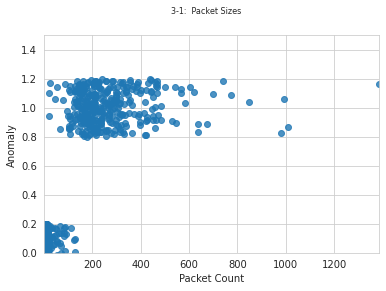

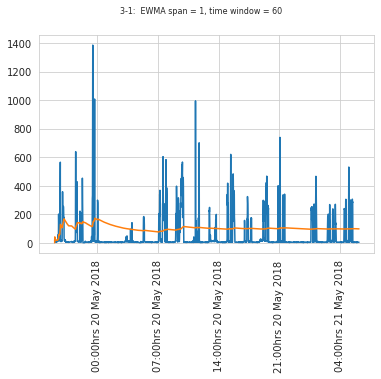

8-1
  loading df1
  loading df2
  Prepping df1
  Calculating values
65.0
239

 8-1,2018-07-31 13:15:11.474173952,2018-08-01 13:14:13.475214848,2018-07-31 14:24:04.299948032,2018-07-31 13:15:21.475975,0,0 days 01:08:42.823973032,8222.0,65.0,12334,239



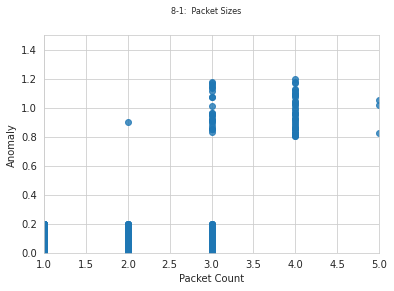

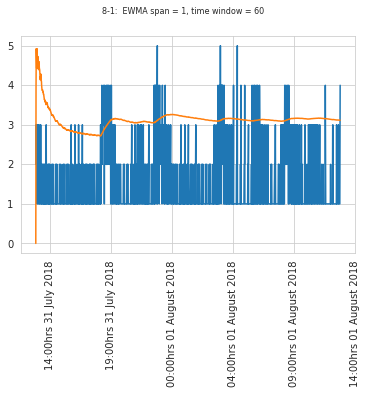

20-1
  loading df1
  loading df2
  Prepping df1
  Calculating values
6.0
127

 20-1,2018-10-02 11:12:49.600292864,2018-10-03 11:11:49.550106880,2018-10-02 11:18:23.951731968,2018-10-02 11:13:19.647690,0,0 days 00:05:04.304041968,16.0,6.0,17193,127



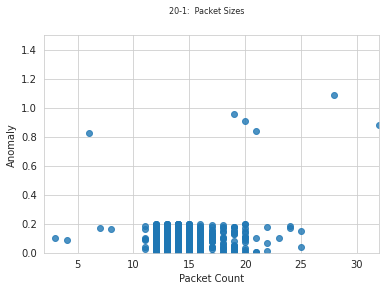

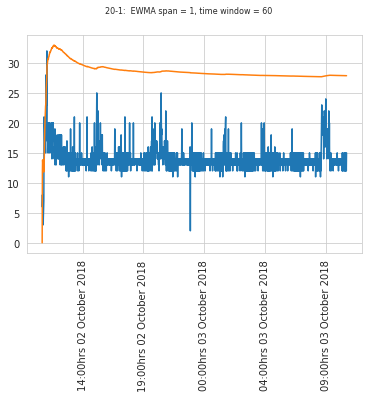

21-1
  loading df1
  loading df2
  Prepping df1
  Calculating values
8.0
165

 21-1,2018-10-03 13:22:33.710598912,2018-10-04 07:09:21.823246080,2018-10-03 13:25:33.455853824,2018-10-03 13:22:38.717489,0,0 days 00:02:54.738364824,14.0,8.0,17193,165



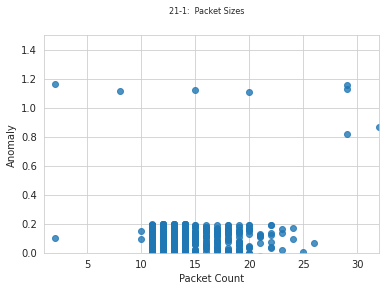

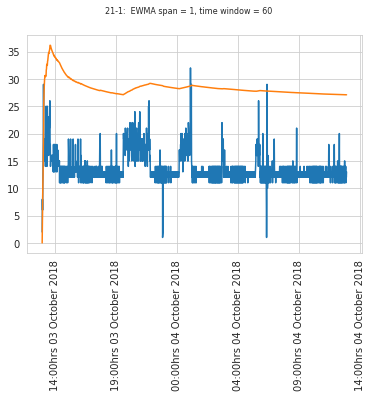

34-1
  loading df1
  loading df2
  Prepping df1
  Calculating values
25.0
2117

 34-1,2018-12-21 14:50:16.962094080,2018-12-22 14:49:58.459568128,2018-12-21 14:55:32.353979136,2018-12-21 14:50:40.460196,0,0 days 00:04:51.893783136,21222.0,25.0,122547,2117



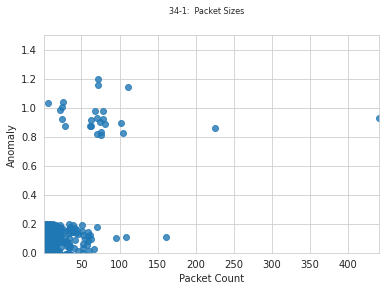

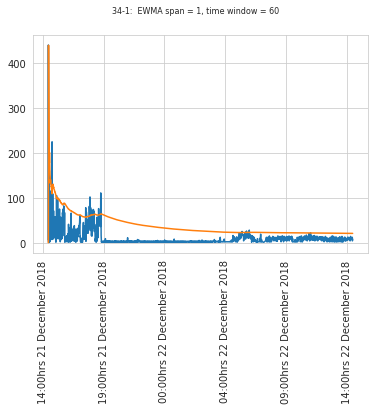

42-1
  loading df1
  loading df2
  Prepping df1
  Calculating values
1.0
287

 42-1,2019-01-10 13:34:48.026073856,2019-01-10 21:55:30.030004992,2019-01-10 13:34:48.026073856,2019-01-10 13:35:11.093374,0,0 days 00:00:23.067300144,6.0,1.0,324,287



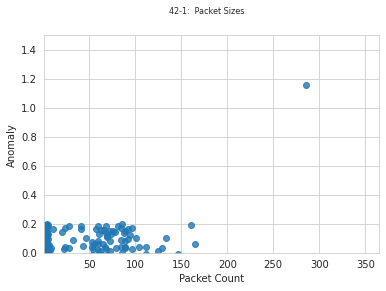

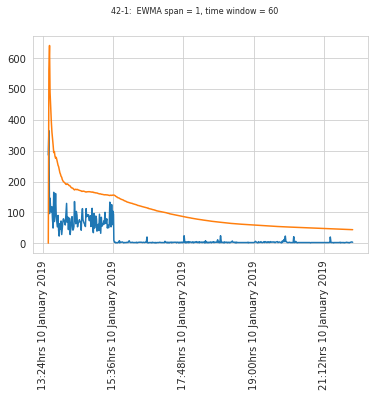

44-1
  loading df1
  loading df2
  Prepping df1
  Calculating values
2.0
774

 44-1,2019-01-10 20:06:29.067207936,2019-01-10 22:00:53.952939008,2019-01-10 20:06:29.067207936,2019-01-10 20:06:50.940222,0,0 days 00:00:21.873014064,26.0,2.0,1306502,774



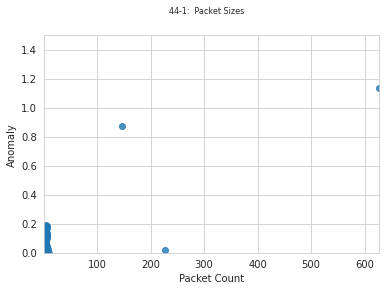

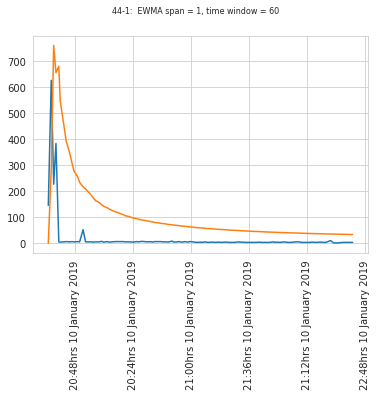

File,Capture start,Capture End, First Detected (label),First Detected (algor),Timegroup, Difference, Total Anomalies (Label), Total Anomalies (algor),Packets (label),Count (algor)
3-1,2018-05-19 18:57:41.866499840,2018-05-20 05:09:55.887376896,2018-05-19 18:57:41.866499840,2018-05-19 18:57:41.920787,0,0 days 00:00:00.054287160,151566.0,340.0,379758,91576
8-1,2018-07-31 13:15:11.474173952,2018-08-01 13:14:13.475214848,2018-07-31 14:24:04.299948032,2018-07-31 13:15:21.475975,0,0 days 01:08:42.823973032,8222.0,65.0,12334,239
20-1,2018-10-02 11:12:49.600292864,2018-10-03 11:11:49.550106880,2018-10-02 11:18:23.951731968,2018-10-02 11:13:19.647690,0,0 days 00:05:04.304041968,16.0,6.0,17193,127
21-1,2018-10-03 13:22:33.710598912,2018-10-04 07:09:21.823246080,2018-10-03 13:25:33.455853824,2018-10-03 13:22:38.717489,0,0 days 00:02:54.738364824,14.0,8.0,17193,165
34-1,2018-12-21 14:50:16.962094080,2018-12-22 14:49:58.459568128,2018-12-21 14:55:32.353979136,2018-12-21 14:50:40.460196,0,0 days 00:

In [5]:
Header="File,Capture start,Capture End, First Detected (label),First Detected (algor),Timegroup, Difference, Total Anomalies (Label), Total Anomalies (algor),Packets (label),Count (algor)\n"
print (Header)
f = open("Summary.csv", "w")
f.write(Header)
f.close()
#files="3,8,9,20,21,34,42,44".split(',')
files="3,8,20,21,34,42,44".split(',')
#files="9".split(',')
for i in files:
    runmain(i)
    
#open and read the file after the appending:
f = open("Summary.csv", "r")
print(f.read())

In [6]:
Deletescratchfiles=False
if Deletescratchfiles :
    import glob
    # get a recursive list of file paths that matches pattern including sub directories
    fileList = glob.glob('/kaggle/working/*', recursive=True)
    fileList

    # Iterate over the list of filepaths & remove each file.
    for filePath in fileList:
        try:
            os.remove(filePath)
        except OSError:
            print("Error while deleting file")
